# Find the "Best" Doc2Vec Model Using Coefficient of Variation

Inspired by the idea used in PCA that singular valures represent the amount of information of a matrix, we believe that the 'best' Doc2vec model has the lowest variance in the singular values of its word vectors. That is to say that every dimension of a word vector captures the same amount of information.     
However, Variance of the singular values can only tell part of the story. Coefficient of variation can better describe the "magnitude" of the variation in singular values.

In [4]:
def evalute(docvectors):
    U,s,V = np.linalg.svd(docvectors)# perform singular value decomposition on the word vectors
    return np.std(s)/np.mean(s)# calculate the Coefficient of Variation of the singular values

## Exhaustive Search

In [5]:
params = {'window': [1, 2, 3, 4, 5, 6, 7], 
             'size': [ 100, 200, 300, 400]}

In [6]:
from itertools import product
result = {}
for size, window in product(params['size'], params['window']):
    docvectors = doctrain(size, window)
    score = evalute(docvectors)
    result[(window, size)] = score
    print('Size: {} | Window: {} | score: {}'.format(size, window, score))

Size: 100 | Window: 1 | score: 0.9358351826667786
Size: 100 | Window: 2 | score: 0.9395149946212769
Size: 100 | Window: 3 | score: 0.9446083903312683
Size: 100 | Window: 4 | score: 0.9481077790260315
Size: 100 | Window: 5 | score: 0.9489095211029053
Size: 100 | Window: 6 | score: 0.9506281614303589
Size: 100 | Window: 7 | score: 0.9517930150032043
Size: 200 | Window: 1 | score: 1.3784544467926025
Size: 200 | Window: 2 | score: 1.4091984033584595
Size: 200 | Window: 3 | score: 1.4339606761932373
Size: 200 | Window: 4 | score: 1.4454121589660645
Size: 200 | Window: 5 | score: 1.4537146091461182
Size: 200 | Window: 6 | score: 1.4602776765823364
Size: 200 | Window: 7 | score: 1.4659299850463867
Size: 300 | Window: 1 | score: 1.7742098569869995
Size: 300 | Window: 2 | score: 1.8187713623046875
Size: 300 | Window: 3 | score: 1.8469626903533936
Size: 300 | Window: 4 | score: 1.869125247001648
Size: 300 | Window: 5 | score: 1.8786348104476929
Size: 300 | Window: 6 | score: 1.8936400413513184
S

In [10]:
doc2vec = Doc2Vec(size=100, window=1, min_count=5, dm = 1, workers=2, iter=30)#best Doc2vec model generated by grid search
doc2vec.build_vocab(tagged_docs)
doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
doc2vec.save('D:/Work/fake-news/doc2vec-100dm-w1.bin.gz')

## Fortified Doc2Vec Model

In [7]:
def doctrain_fortified(size, window):
    doc2vec = Doc2Vec(size=size, window=window, min_count=5, dm = 1, workers=2, iter=30)
    doc2vec.build_vocab(tagged_docs)
    w2v_loc = 'D:/Work/fake-news/GoogleNews-vectors-negative300.bin.gz'
    doc2vec.intersect_word2vec_format(w2v_loc, binary=True)
    doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
    return np.array(doc2vec.docvecs)

In [9]:
params = {'window': [1, 2, 3, 4, 5, 6, 7, 8]}
for window in params['window']:
    docvectors = doctrain_fortified(300, window)
    score = evalute(docvectors)
    print('Size: 300 | Window: {} | score: {}'.format(window, score))

Size: 300 | Window: 1 | score: 0.9168175458908081
Size: 300 | Window: 2 | score: 1.0319315195083618
Size: 300 | Window: 3 | score: 1.1303040981292725
Size: 300 | Window: 4 | score: 1.2096953392028809
Size: 300 | Window: 5 | score: 1.2759608030319214
Size: 300 | Window: 6 | score: 1.333014965057373
Size: 300 | Window: 7 | score: 1.3782696723937988
Size: 300 | Window: 8 | score: 1.418958306312561


In [11]:
doc2vec = Doc2Vec(size=300, window=1, min_count=5, dm = 1, 
                  workers=2, iter=30)#best fortified Doc2vec model generated by grid search
doc2vec.build_vocab(tagged_docs)
w2v_loc = 'D:/Work/fake-news/GoogleNews-vectors-negative300.bin.gz'
doc2vec.intersect_word2vec_format(w2v_loc, binary=True)
doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
doc2vec.save('D:/Work/fake-news/doc2vec-w1-fortified.bin.gz')

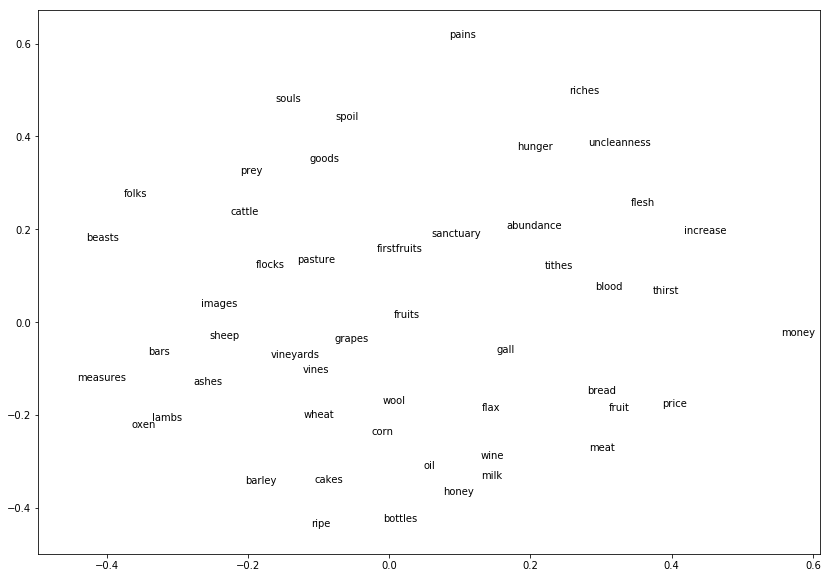

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


_, ax = plt.subplots(figsize=(14,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(f_tokens[i], ((embeddings[i,0], embeddings[i,1])))

# Conclusion

### We chose two Doc2Vec models with the lowest coefficient of cariation as the best models for hypertuning.      
### No.1: Size=100, Window=1     
### No.2: Size=300, Window=1, Fortified by Google News Word2Vec Model

# Hypertuning for Doc2Vec size:100 window:1

## Preparation

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:/Work/fake-news/fake_or_real_news.csv')
df.label = df.label.replace({"FAKE":0, "REAL":1})  #replace 'FAKE' as 0, 'REAL' as 1
df = df.drop('title_vectors',1)
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",0
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,1
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,1
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,1


In [2]:
import nltk
def clean_list(tokenized_list):
    import string 
    sw = nltk.corpus.stopwords.words('english')
    extend = ['https', 'http', '•', '”', '“','—',"n't",'’',"'s"]
    sw = sw + extend
    new_list = [[token.lower() for token in tlist if token not in string.punctuation and token.lower() not in sw] for tlist in tokenized_list]
    return new_list

title = [nltk.word_tokenize(i) for i in df.title]
text = [nltk.word_tokenize(i) for i in df.text]

title = clean_list(title)
text = clean_list(text)

In [19]:
from gensim.models import Doc2Vec
doc2vec = Doc2Vec.load('D:/Work/fake-news/doc2vec-100dm_w1.bin.gz')#load the doc2vec model

In [20]:
text_vectors = [doc2vec.infer_vector(i) for i in text]
title_vectors = [doc2vec.infer_vector(i) for i in title]

In [21]:
text_vector=np.array(text_vectors)
title_vector=np.array(title_vectors)

In [22]:
X_text = text_vector
X_title = title_vector
y = np.array(df.label)

In [57]:
v_params = [0, 0.1, 0.2, 0.4, 0.5, 0.6] #set different weights for title vectors and text vectors

In [59]:
import xgboost as xgb
from time import time
from scipy.stats import randint as sp_randint
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
        
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic')


param_dist = {"n_estimators": sp_randint(1000, 5000),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,15)}

## Using Randomized Grid Search to Find the Best Parameters

In [17]:
for v in v_params:
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 20

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 1411.46 seconds for 20 candidates parameter settings.
v_param: 0
best params: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 2052}
score: 0.8972667295004713
RandomizedSearchCV took 1048.01 seconds for 20 candidates parameter settings.
v_param: 0.1
best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 4261}
score: 0.8989161168708766
RandomizedSearchCV took 1027.19 seconds for 20 candidates parameter settings.
v_param: 0.2
best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 3748}
score: 0.8989161168708766
RandomizedSearchCV took 1115.54 seconds for 20 candidates parameter settings.
v_param: 0.4
best params: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 1275}
score: 0.897502356267672
RandomizedSearchCV took 1017.76 seconds for 20 candidates parameter settings.
v_param: 0.5
best params: {'learning_rate': 0.2, 'max_depth': 3, '

The result of grid search indicates that the best parameter for weighted sum of the vectors is 0.2.
The best parameters for XGBoostClassifier are: learning_rate = 0.05 max_depth = 3, n_estimators = 3700, min_child_weight = 2

## Model Training

### v=0.2 Hypertuned XGBoost

In [25]:
v = 0.2
X = v*X_title + (1-v)*X_text
    
random_state = 42
test_size = .33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)

XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.05, 
                         max_depth = 3, min_child_weight = 2, n_estimators =3700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=2, missing=None, n_estimators=3700,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Model Result

In [26]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.90      0.91      0.91      1071
       Real       0.91      0.90      0.90      1020

avg / total       0.90      0.90      0.90      2091

Accuracy: 0.904830224773


# Hypertuning for Fortified Doc2Vec size:300 window:1

In [29]:
from gensim.models import Doc2Vec
doc2vec = Doc2Vec.load('D:/Work/fake-news/doc2vec-w1-fortified.bin.gz')#load the fortified doc2vec model

In [30]:
text_vectors = [doc2vec.infer_vector(i) for i in text]
title_vectors = [doc2vec.infer_vector(i) for i in title]

In [31]:
text_vector=np.array(text_vectors)
title_vector=np.array(title_vectors)

In [32]:
X_text = text_vector
X_title = title_vector
y = np.array(df.label)

In [12]:
import xgboost as xgb
from time import time
from scipy.stats import randint as sp_randint
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
v_params = [0, 0.2, 0.4, 0.5, 0.6]

XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic')

In [28]:
for v in v_params:
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 20

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 2160.58 seconds for 20 candidates parameter settings.
v_param: 0
best params: {'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 1879}
score: 0.90315739868049
RandomizedSearchCV took 2386.16 seconds for 20 candidates parameter settings.
v_param: 0.2
best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 3815}
score: 0.9064561734213007
RandomizedSearchCV took 1872.04 seconds for 20 candidates parameter settings.
v_param: 0.4
best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 2670}
score: 0.9104618284637135
RandomizedSearchCV took 2393.51 seconds for 20 candidates parameter settings.
v_param: 0.5
best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 2605}
score: 0.9076343072573044
RandomizedSearchCV took 2022.28 seconds for 20 candidates parameter settings.
v_param: 0.6
best params: {'learning_rate': 0.05, 'max_depth': 3, 'm

## Further Tuning for v=0.2

In [13]:
    param_dist = {"n_estimators": sp_randint(1000, 5000),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
              "subsample":[0.2, 0.5, 0.8, 1],
              "gamma":[0.1, 0.2, 0.3, 0.4],
              "colsample_bytree":[0.2, 0.4, 0.6, 0.8, 1],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,10)}
    v=0.2
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 40

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 2858.70 seconds for 40 candidates parameter settings.
v_param: 0.2
best params: {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 1672, 'subsample': 0.5}
score: 0.9088124410933082


## Model Training

### v=0.2  Hypertuned XGBoost

In [61]:
v = 0.2
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.1, 
                         max_depth = 4, min_child_weight = 3, n_estimators = 3800)
XGBmodel.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=3, missing=None, n_estimators=3800,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### v=0.4 Hypertuned XGBoost

In [51]:
v = 0.4
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.2, 
                         max_depth = 3, min_child_weight = 1, n_estimators = 2700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2700,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### v=0.2 Further Tuned XGBoost

In [63]:
v = 0.2
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', colsample_bytree = 0.8, gamma = 0.4,
                         learning_rate = 0.05, max_depth = 2, min_child_weight = 2, n_estimators = 1700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.05,
       max_delta_step=0, max_depth=2, min_child_weight=2, missing=None,
       n_estimators=1700, n_jobs=2, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Model Result

### v=0.2

In [62]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.92      0.92      1071
       Real       0.92      0.91      0.92      1020

avg / total       0.92      0.92      0.92      2091

Accuracy: 0.918699186992


### v=0.4

In [52]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.91      0.92      1066
       Real       0.91      0.92      0.91      1025

avg / total       0.91      0.91      0.91      2091

Accuracy: 0.91487326638


### v=0.2 Further Tuned

In [64]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.92      0.92      1071
       Real       0.92      0.92      0.92      1020

avg / total       0.92      0.92      0.92      2091

Accuracy: 0.921568627451
